<a href="https://colab.research.google.com/github/bk191/Python_Projects/blob/main/Analysing_Nobel_Prize_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# %pip install --upgrade plotly

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [9]:
#Number of rows in DataFrame
df_data.shape[0]

962

In [10]:
#Number of columns in DataFrame
df_data.shape[1]

16

In [11]:
#Column names
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [12]:
#Year that the first Nobel Prize was awarded
df_data["year"].min()

1901

In [13]:
#Year that the most recent Nobel Prize was awarded
df_data["year"].max()

2020

In [14]:
#Check for duplicated rows
df_data.duplicated().sum()

0

In [15]:
#Check for Nan values
df_data.isnull().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [16]:
#Check data types of DataFrame
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [17]:
#Converting the "birth_date" column to DateTime type
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [18]:
#Converting the column "prize_share" to numeric type
separate_values = df_data["prize_share"].str.split("/", expand=True)
numerators = pd.to_numeric(separate_values[0])
denominators = pd.to_numeric(separate_values[1])
df_data["pct_share"] = numerators/denominators

In [20]:
df_sex = df_data["sex"].value_counts()

In [21]:
#Creating a donut chart visualsing the percentage split of prizes that went to men versus women
px.pie(df_sex, values=df_sex.values, names=df_sex.index, hole=.3)

In [22]:
#Investigating the first 3 women to have won a Nobel Prize
df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,pct_share
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [23]:
#Investigating repeat winners of a Nobel Prize
df_data[df_data["full_name"].duplicated() == True]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,pct_share
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [24]:
#Finding the different cattegories that a prize can be awarded in
df_data["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [25]:
#Creating a new DataFrame containing the counts of he number of times that a prize has been awarded
df_prizes = df_data["category"].value_counts()

In [26]:
#Creating a bar chart visualising the number of different times that a Nobel Prize category has been won
ax = px.bar(df_prizes, x=df_prizes.index,
            y=df_prizes.values,
            labels={"index": "Prize Category", "y": "Prize Number"},
            color=df_prizes.values,
            color_continuous_scale="Aggrnyl",
            )
ax.update_layout(coloraxis_showscale=False,
                 title="Nobel Prizes awarded by category")

ax.show()

In [27]:
#Finding the first winner of the Nobel Prize in Economics
df_data[df_data['category'] == "Economics"].sort_values(by="year").head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,pct_share
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


In [28]:
#Creating a new DataFrame with wins per category split between men and women
df_cat_sexes = df_data.groupby(["category", "sex"], as_index=False).agg({"prize":pd.Series.count})
df_cat_sexes.sort_values(by="prize", ascending=True, inplace=True)

In [29]:
#Creating a visualisation of the wins in each category by each sex#
ax2 = px.bar(df_cat_sexes,
             x=df_cat_sexes.category,
             y=df_cat_sexes.prize,
             color=df_cat_sexes.sex,
             labels={"category": "Prize Category", "prize": "Number of Prizes Won"},
             title="Number of Nobel Prizes won by Sex")
ax2
ax2.show()

In [30]:
num_of_prizes = df_data.groupby(by="year").count().prize

In [31]:
#Creating the rolling average per 5 years
rolling_average = num_of_prizes.rolling(window=5).mean()

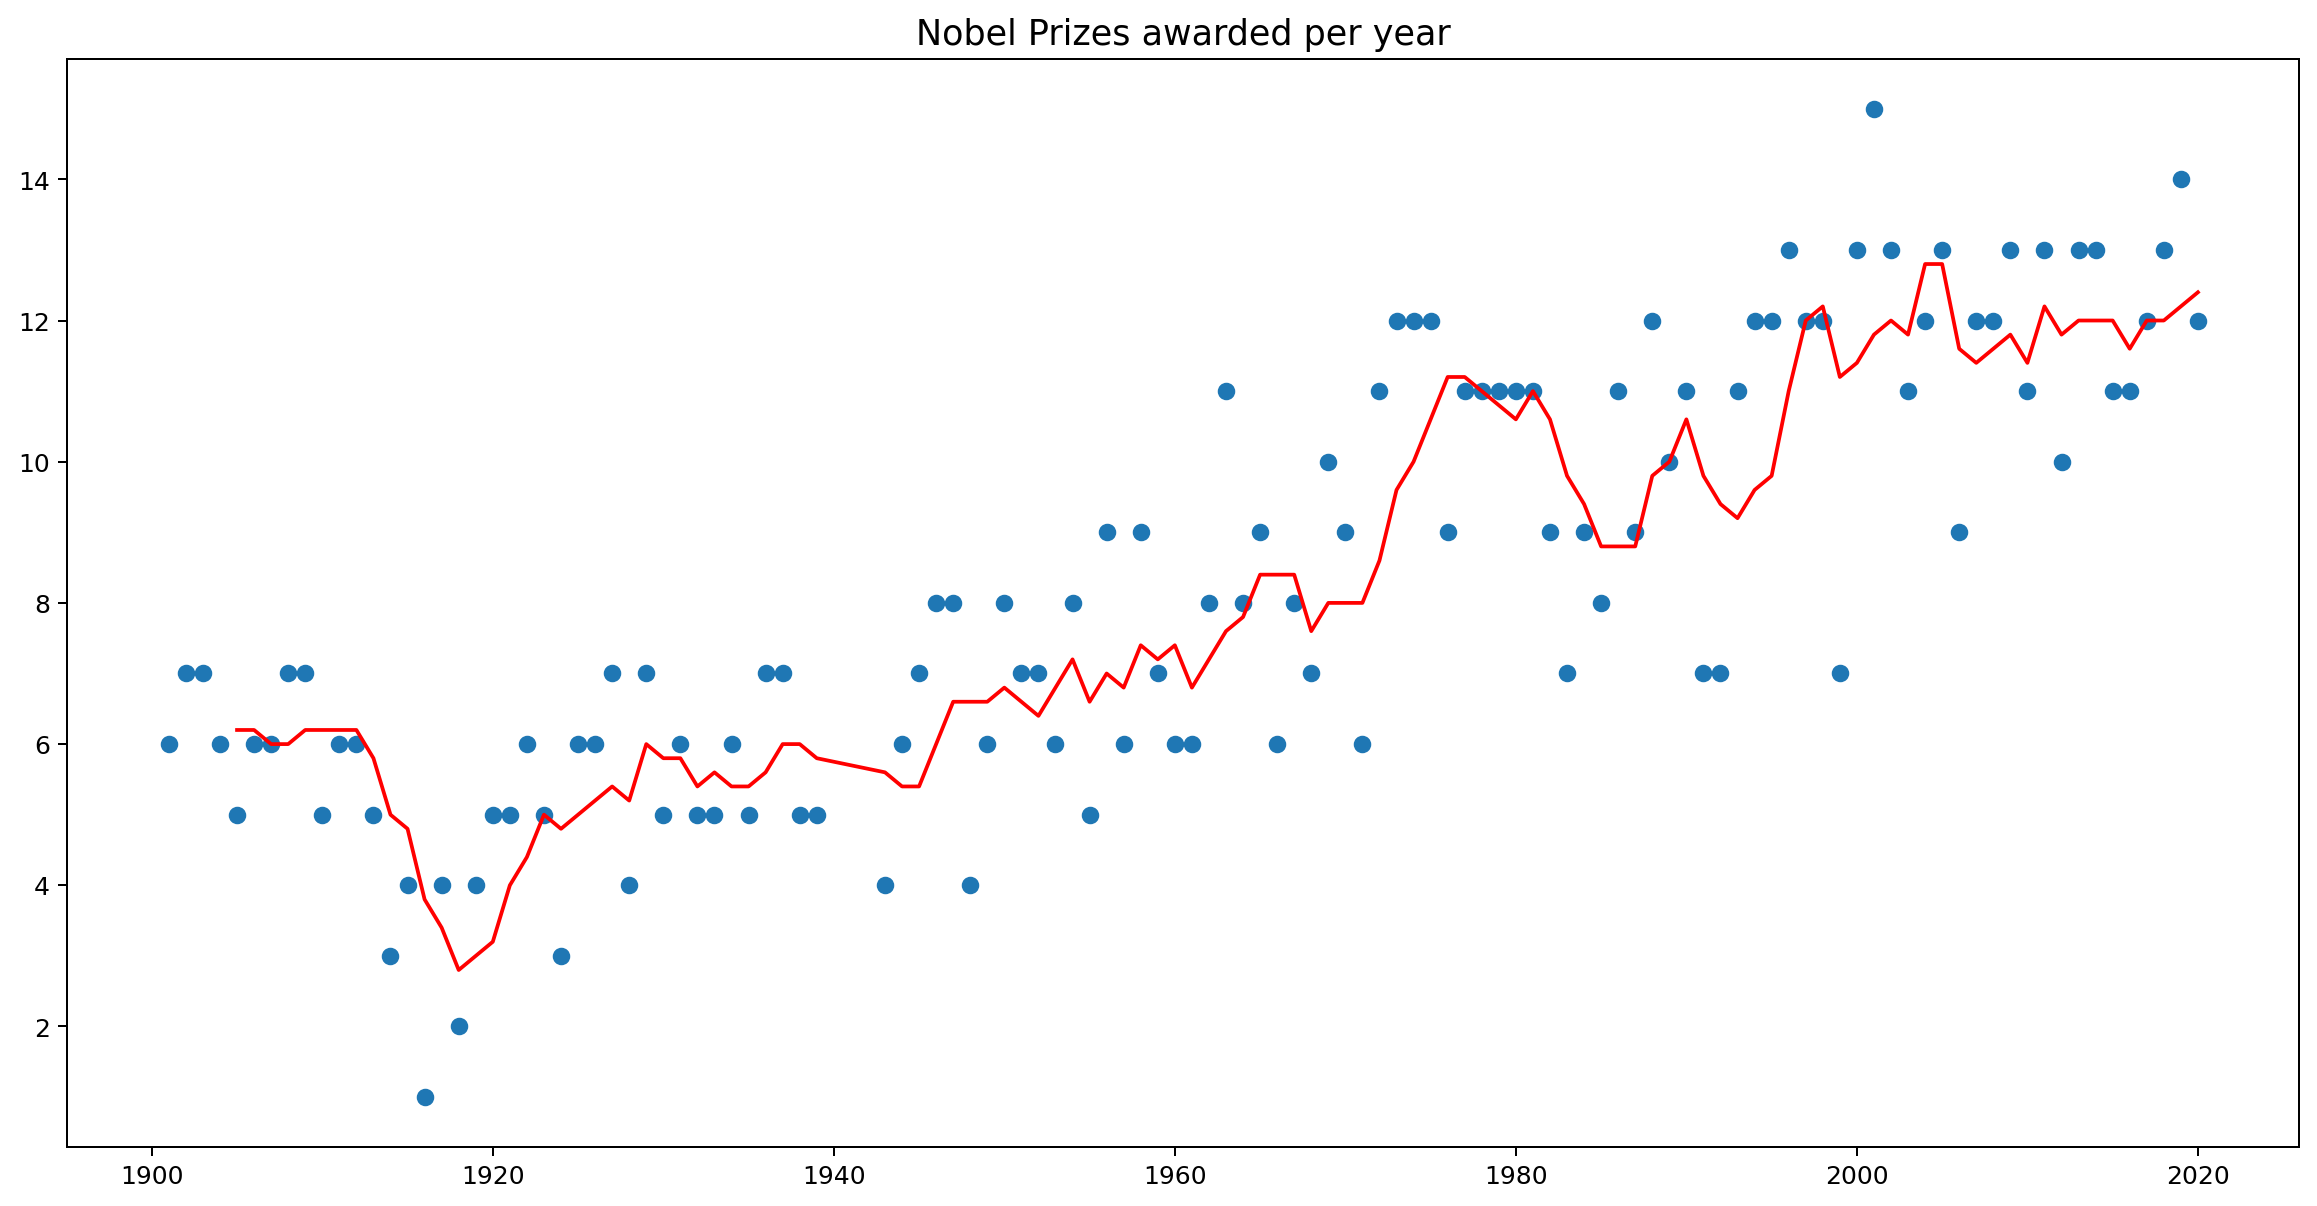

In [32]:
plt.figure(figsize=(16, 8), dpi=180)
plt.title("Nobel Prizes awarded per year", fontsize=14)
plt.scatter(x=num_of_prizes.index,
            y=num_of_prizes.values
            )
plt.plot(num_of_prizes.index,
         rolling_average.values,
         c="red")

plt.show()

In [33]:
price_avg_per_year = df_data.groupby(by="year").mean().pct_share

In [34]:
share_rolling_avg = price_avg_per_year.rolling(window=5).mean()

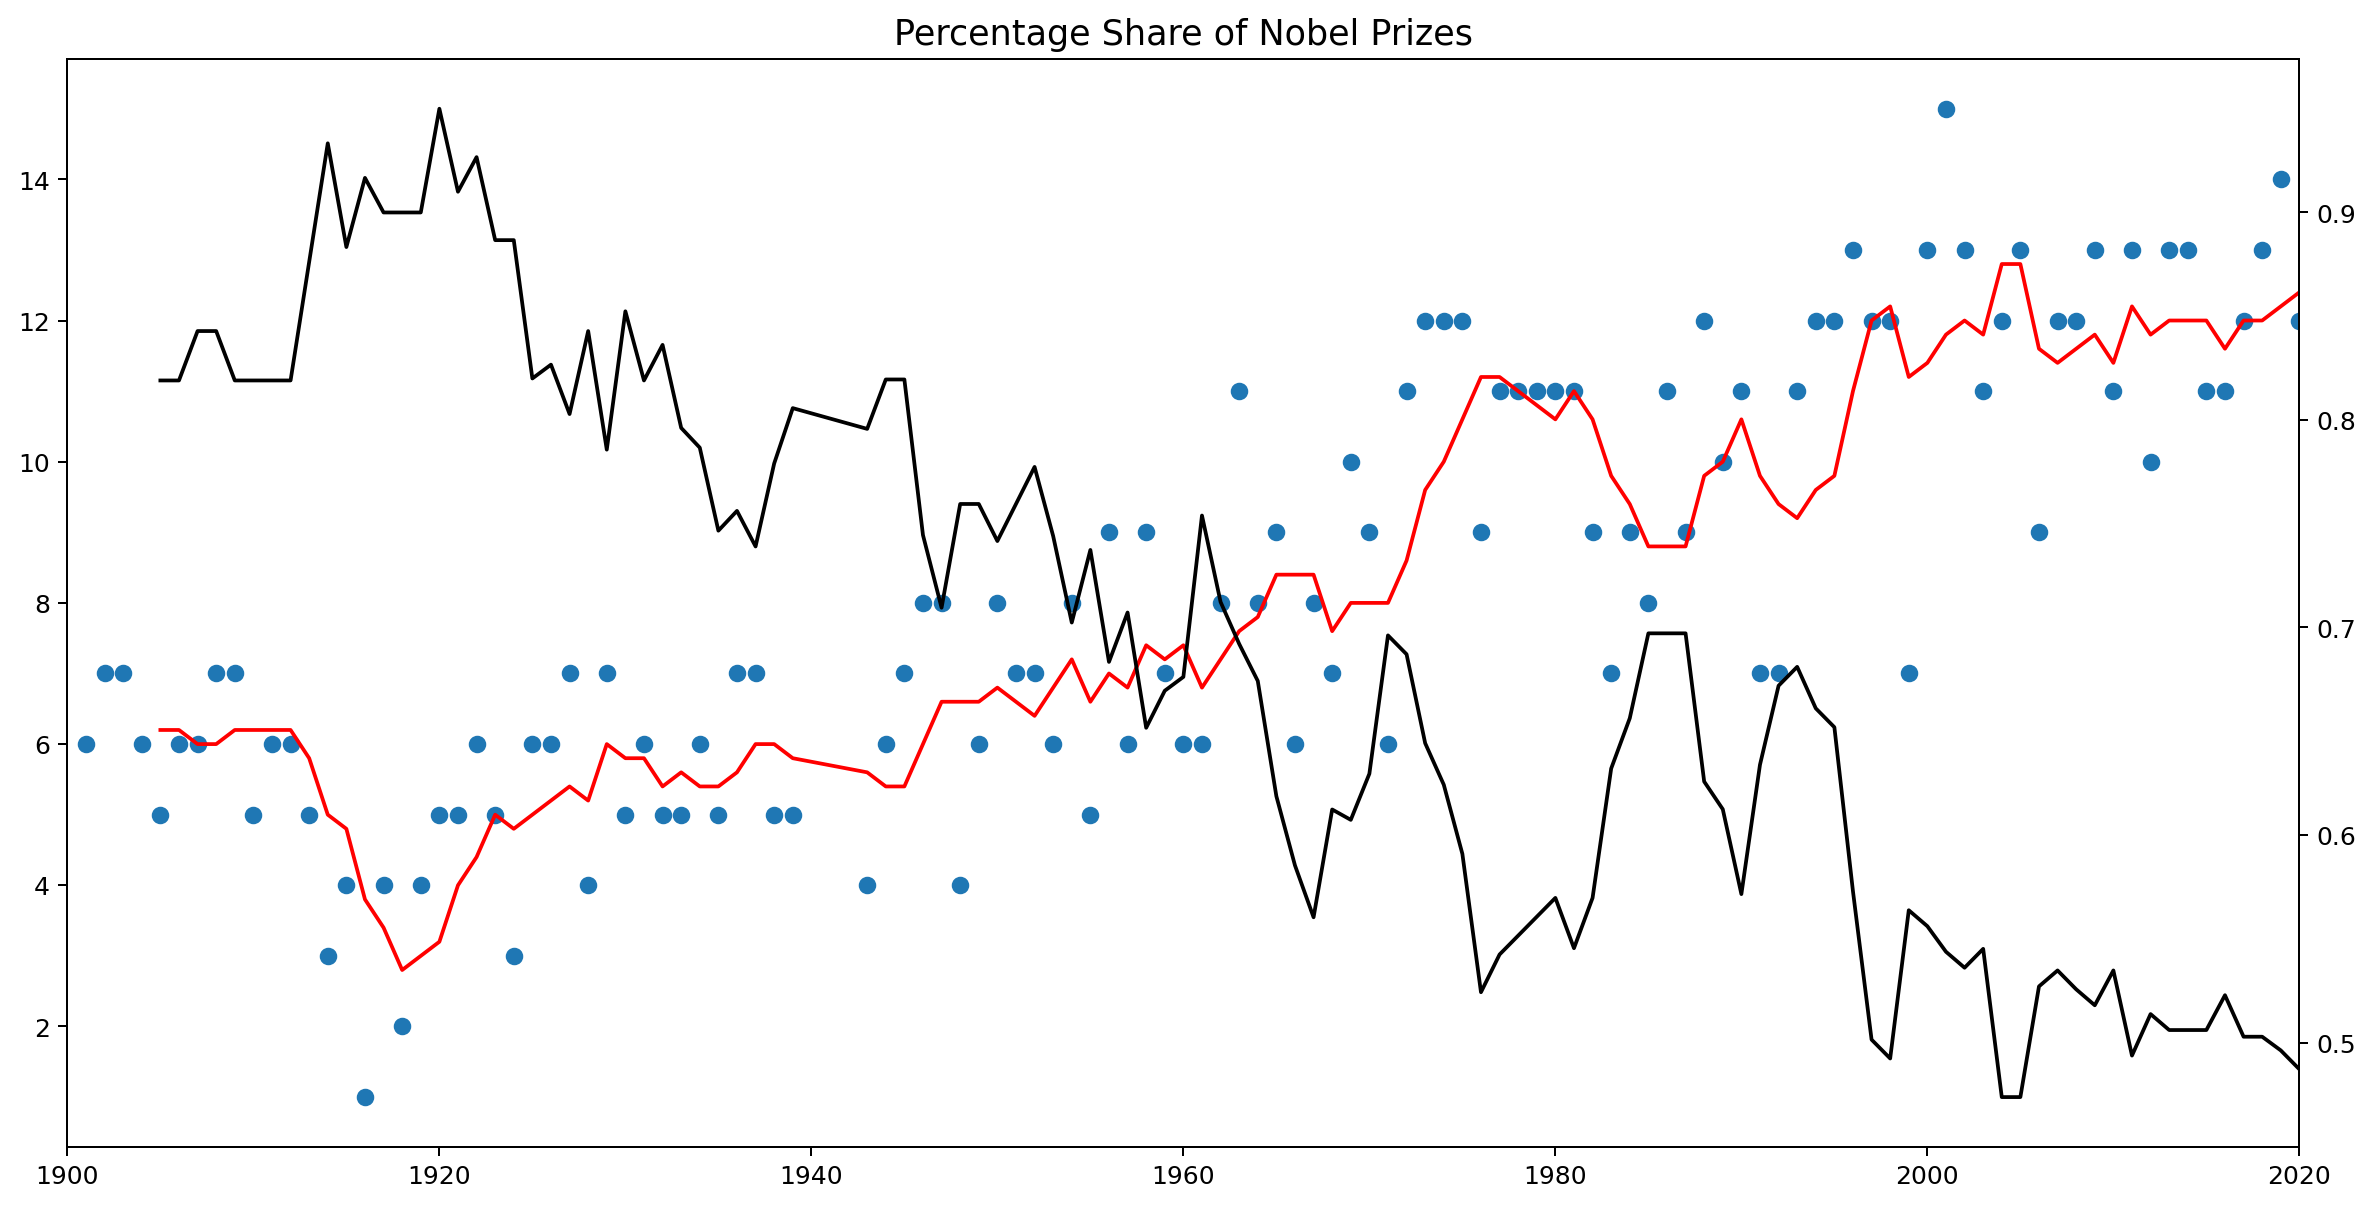

In [35]:
plt.figure(figsize=(16, 8), dpi=180)
ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_xlim(1900, 2020)
plt.title("Percentage Share of Nobel Prizes", fontsize=14)
ax1.scatter(x=num_of_prizes.index,
            y=num_of_prizes.values
            )
ax1.plot(num_of_prizes.index,
         rolling_average.values,
         c="red")

ax2.plot(price_avg_per_year.index,
         share_rolling_avg.values,
         c="black")


plt.show()

In [36]:
top_20_df = df_data.groupby(by="birth_country_current", as_index=False).agg({"prize": pd.Series.count})

In [37]:
top_20_df.sort_values(by="prize", ascending=False, inplace=True)

In [38]:
top_20_df = top_20_df.head(20)

In [39]:
top_20_df

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [40]:
top_20_bar = px.bar(top_20_df,
       y=top_20_df.birth_country_current,
       x=top_20_df.prize,
       orientation="h",
       color=top_20_df.prize,
       color_continuous_scale="sunset",
       labels = {"prize": "Number of Nobel Prizes Won", "birth_country_current": "Country"})
top_20_bar.update_layout(title="Top 20 Nobel Prize Winning Countires",
                         coloraxis_showscale=False)


In [43]:
df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})

In [45]:
df_countries.sort_values("prize", ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [48]:
px.choropleth(df_countries, color="prize",
              locations="ISO",
              color_continuous_scale="matter",
              hover_name="birth_country_current")

In [54]:
df_orgs = df_data.groupby("organization_name", as_index=False).agg({"prize": pd.Series.count})

In [57]:
df_orgs.sort_values("prize", ascending=False, inplace=True)

In [63]:
org_bar = px.bar(df_orgs[0:20], x="prize",
       y="organization_name",
       orientation="h",
       color="prize",
       labels={"prize" : "Number of Prizes Won", "organization_name": "Organisation Name"},
       )
org_bar.update_layout(coloraxis_showscale=False,
                      title="Prizes Won per Organisation")
org_bar.show()

In [72]:
df_org_cities = df_data.groupby(["organization_city"], as_index=False).agg({"prize": pd.Series.count})

In [73]:
df_org_cities.sort_values("prize", ascending=False, inplace=True)

In [76]:
org_cities_bar = px.bar(df_org_cities[:20],
       x="organization_city",
       y="prize",
       color="prize",
       labels={"prize": "Number of Prizes", "organization_city": "Organisation City"}
       )
org_cities_bar.update_layout(title="Number of Prizes Won by Organisation City",
                             coloraxis_showscale=False)

In [78]:
#Creating a new DataFrame containing a number of prizes won in each nobel prize winners birth city
birth_cities_df = df_data.groupby("birth_city", as_index=False).agg({"prize": pd.Series.count})

In [79]:
#Sorting the "birth_cities_df" DataFrame
birth_cities_df.sort_values("prize", ascending=False, inplace=True)

In [86]:
#Creating a bar chart visualising the number of nobel prizes won by birt city
px.bar(birth_cities_df[0:20],
       x="birth_city",
       y="prize",
       color="prize",
       color_continuous_scale="Plasma",
       title="Nobel Prizes by Birth City",
       labels={"prize": "Number of Prizes", "birth_city": "Birth City"})

In [103]:
#Creating a new DataFrame to create a sunburst chart
df_orgs2 = df_data.groupby(by=["organization_country", "organization_city", "organization_name"], as_index=False).agg({"prize": pd.Series.count})

In [104]:
#Creating a sunburst chart
px.sunburst(df_orgs2, path=["organization_country", "organization_city", "organization_name"], values="prize")

In [105]:
#Getting the birth year of nobel prize winners
birth_year = df_data["birth_date"].dt.year

In [106]:
#Adding a new column containing the age that a nobel prize winner won their prize
df_data["winning_age"] = df_data['year'] - birth_year

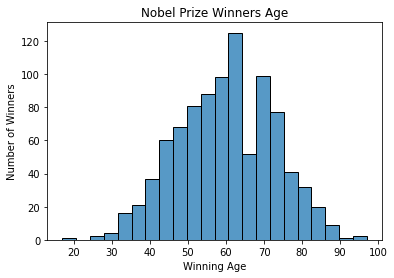

In [117]:
#Creating a histogram to investigate the ages of nobel prize winners
age_hist = sns.histplot(df_data, x="winning_age")
age_hist.set(title="Nobel Prize Winners Age", xlabel="Winning Age", ylabel="Number of Winners")
plt.show()

In [118]:
#Calculating the descriptive statistics of the "winning age" column
df_data["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

[Text(0, 0.5, 'Winning Age at Time of Prize'),
 Text(0.5, 0, 'Year of Prize'),
 Text(0.5, 1.0, 'Winning Age Regression')]

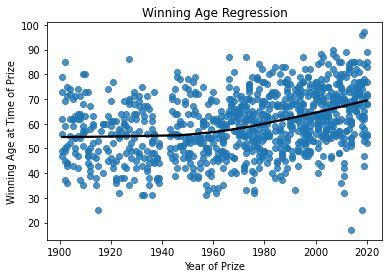

In [123]:
#Investigating trends in the age of nobel prize winners over time
age_reg = sns.regplot(data=df_data,
            x="year",
            y="winning_age",
            lowess=True,
            line_kws={"color": "black"})
age_reg.set(title="Winning Age Regression", xlabel="Year of Prize", ylabel="Winning Age at Time of Prize")